In [1]:
"""Improved genetic algorithm for shortest path linking coordinates

    FAES BIOF509, Week 02
    Changed to generational creation of unique populations
    Instead of using same population and iterating through generations
    20160219 Wayne Liu
"""

import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

print("Numpy:", np.__version__)

random.seed(0)

Numpy: 1.10.4


In [22]:
def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance

In [23]:
def select_best(population, cost_func, num_to_keep):
    """Selects best specified population based on the cost function
    
    Arguments:
    population -- List of shuffled coordinates
    cost_func -- Function deriving optimized metric
    num_to_keep -- Number of best population to keep
    
    Returns:
    List of best optimized  specified number of coordinates
    """
    scored_population = [(i, cost_func(i)) for i in population]
    scored_population.sort(key=lambda x: x[1])
    return [i[0] for i in scored_population[:num_to_keep]]


def new_path(existing_path):
    """Reorders list of coordinates
    
    Arguments:
    existing_path -- List of coordinates, e.g. [(0,0), (1,1)]
        
    Returns:
    path -- List of reordered coordinates, e.g. [(0,0), (1,1)]
    """
    path = existing_path[:]
    # switches three points instead of two, marginally better
    point = random.randint(0, len(path)-3)
    path[point+2], path[point+1], path[point] = path[point], path[point+2], path[point+1]
    # print(point)
    return path

In [54]:
def recombine(population, new_path_func):
    """Recombines random two halves of two random sets of coordinates
    
    Argument:
    population -- List of coordinates, e.g. [(0,0), (1,1)]
    new_path_func -- Function that swaps coordinate positions
    
    Returns:
    child -- A set of coordinates, recombined from two random sets of coordinates, e.g. [(9,9), (2,3)]
    """
    # Randomly choose two parents
    options = list(range(len(population)))
    random.shuffle(options)
    partner1 = options[0]
    partner2 = options[1]
    # Choose a split point, take the first parents order to that split point, 
    # then the second parents order for all remaining points
    split_point = random.randint(1, len(population[0])-2) # forces a change, cannot keep same parent
    child = population[partner1][:split_point]
    for point in population[partner2]:
        if point not in child:
            child.append(point)
    child = new_path_func(child) # use new path to scramble the order
    return child

In [93]:
def genetic_algorithm_optimizer(starting_path, cost_func, new_path_func, pop_size, generations):
    """Selects best path from set of coordinates by randomly joining two sets of coordinates
    
    Arguments:
    starting_path -- List of coordinates, e.g. [(0,0), (1,1)]
    cost_func -- Optimization metric calculator, e.g. distance()
    new_path_func -- Returns reordered coordinates, e.g. new_path()
    pop_size -- Number of each set of coordinates in each generation, 500
    generations -- Number of iterations, 100
    
    Returns:
    best_path -- A list of optimized coordinates, e.g. [(2,3), (5,6)]
    best_cost -- The optimized least distance
    history -- Dictionary of generation and distance metrics
    """
    history = []
    for w in range(generations):
        # Create a population by randomly shuffling the points
        population = []
        for i in range(pop_size):
            new_path = starting_path[:]
            random.shuffle(new_path)
            population.append(new_path)
        # Select the top 20% of routes  
        pop_best = select_best(population, cost_func, int(pop_size / 5))
        new_population = []
        # Mutate random top 20% routes by joining and reordering
        for i in range(pop_size):
            path = recombine(pop_best, new_path_func)
            new_population.append(path) 
        population = new_population
        # Sort best route within generation
        record = [(w, n, cost_func(n)) for n in population]
        record.sort(key= lambda x: x[2])
        history.append(record[0])
    # Sort best route among generations
    print("best of first gen:", history[0])
    history.sort(key=lambda x: x[2])
    print("best:", history[0])
    best_path = history[0][1]
    best_cost = history[0][2]
    history.sort(key=lambda x: x[0])
    return (best_path, best_cost, history)

In [52]:
coords = [(0,0), (10,5), (10,10), (5,10), (3,3), (3,7), (12,3), (10,11)]

best of first gen: (0, [(5, 10), (10, 11), (10, 10), (10, 5), (12, 3), (3, 7), (0, 0), (3, 3)], 35.63471823311827)
best: (21, [(12, 3), (10, 5), (10, 10), (10, 11), (5, 10), (3, 7), (3, 3), (0, 0)], 25.775638600922246)
best cost: 25.775638600922246


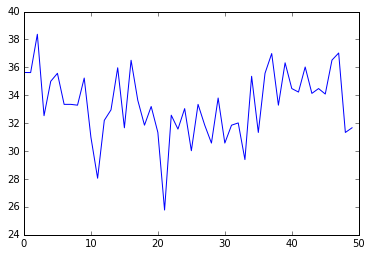

In [97]:
best_path, best_cost, history = genetic_algorithm_optimizer(coords, distance, new_path, 100, 50)
print("best cost:", best_cost)
plt.plot([i[2] for i in history])
plt.show()  

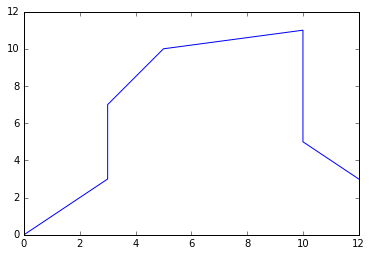

In [98]:
plt.plot([i[0] for i in best_path], [i[1] for i in best_path])
plt.show()